# Expectation maximization
Set expected probability as ratio of token frequency in context of Whisper token over absolute token frequency, weighted by average distance between indices

In [2]:
import numpy as np
from collections import defaultdict
import seaborn as sb

In [9]:
ipa_seqs = [
    [1, 10, 5],
    [10, 25, 9],
]

whisper_seqs = [
    [20, 9, 2],
    [11, 13, 6, 10],
]

def get_prob_tensors(ipa_seqs, whisper_seqs):
    ipa_vocab_size = np.max(np.concatenate(ipa_seqs))+1
    whisper_vocab_size = np.max(np.concatenate(whisper_seqs))+1

    eps=1e-8 # avoid division by zero
    sum_sqd_dist = np.full([whisper_vocab_size, ipa_vocab_size], eps)
    ipa_token_counts = np.full(ipa_vocab_size, eps)
    return sum_sqd_dist, ipa_token_counts
sum_sqd_dist, ipa_token_counts = get_prob_tensors(ipa_seqs, whisper_seqs)

In [10]:
sum_sqd_dist.shape

(21, 26)

In [12]:
def initialize_probs(ipa_seqs, whisper_seqs, sum_sqd_dist, ipa_token_counts):
    for ipa_seq, whisper_seq in zip(ipa_seqs, whisper_seqs):
        for i, ipa_token in enumerate(ipa_seq):
            ipa_token_counts[ipa_token]+=1
            for j, whisper_token in enumerate(whisper_seq):
                i_relative=i/len(ipa_seq)
                j_relative=j/len(whisper_seq)
                sum_sqd_dist[whisper_token,ipa_token]+=(i_relative-j_relative)**2
    prob_unnorm = sum_sqd_dist/(ipa_token_counts)
    sum_prob_unnorm = prob_unnorm.sum(axis=0)
    prob_norm=prob_unnorm/sum_prob_unnorm
    return prob_norm
    
probmat=initialize_probs(ipa_seqs, whisper_seqs, sum_sqd_dist, ipa_token_counts)
probmat.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

<Axes: >

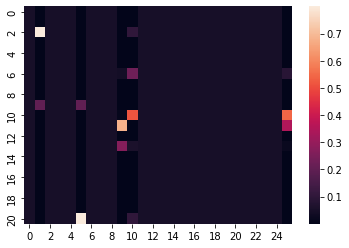

In [13]:
sb.heatmap(probmat)